In [1]:
import librosa
import librosa.display
import pandas as pd
import soundfile
import pyttsx3
import os
import sys
import glob, pickle
import numpy as np
import sklearn
from IPython.display import Audio
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
Ravdess = "D:\project\Data/"

In [3]:
ravdess_directory_list = os.listdir(Ravdess)

file_emotion = []
file_path = []
for dir in ravdess_directory_list:
    # as their are 20 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir(Ravdess + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # third part in each file represents the emotion associated to that file.
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# changing integers to actual emotions.
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head()

,Emotions,Path
0,neutral,D:\project\Data/Actor_01/03-01-01-01-01-01-01.wav
1,neutral,D:\project\Data/Actor_01/03-01-01-01-01-02-01.wav
2,neutral,D:\project\Data/Actor_01/03-01-01-01-02-01-01.wav
3,neutral,D:\project\Data/Actor_01/03-01-01-01-02-02-01.wav
4,calm,D:\project\Data/Actor_01/03-01-02-01-01-01-01.wav


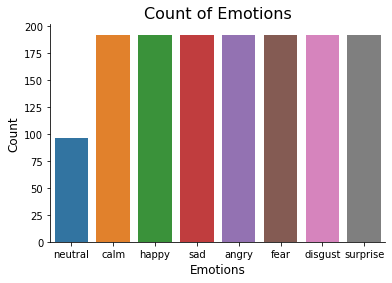

In [4]:
plt.title('Count of Emotions', size=16)
sns.countplot(Ravdess_df.Emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [5]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveplot(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

In [6]:
emotion='fear'
path = np.array(Ravdess_df.Path[Ravdess_df.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)


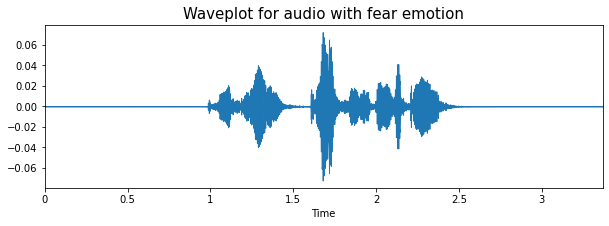

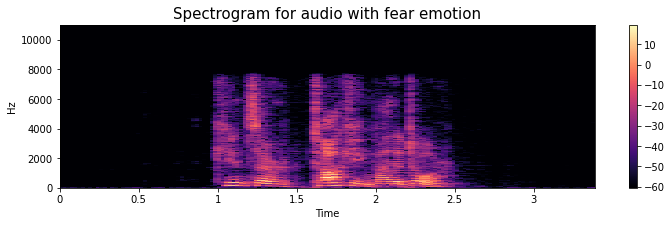

In [96]:
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)


In [7]:
Audio(path)

In [8]:
emotion='angry'
path = np.array(Ravdess_df.Path[Ravdess_df.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)

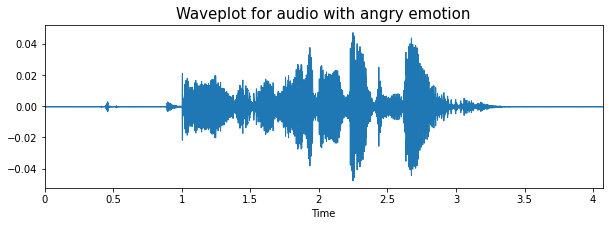

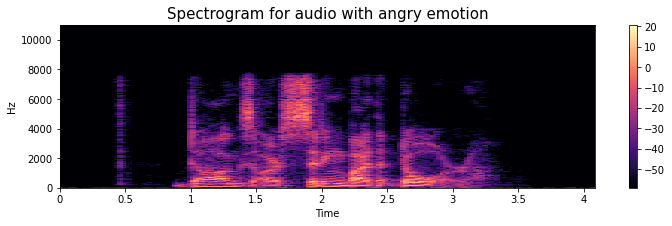

In [99]:
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)

In [9]:
Audio(path)

In [10]:
emotion='sad'
path = np.array(Ravdess_df.Path[Ravdess_df.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)


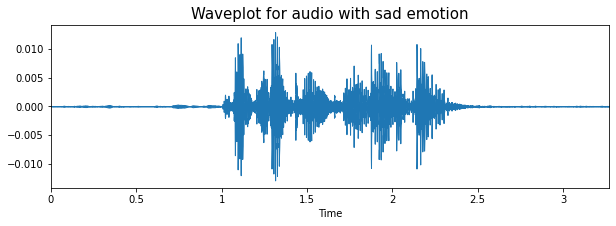

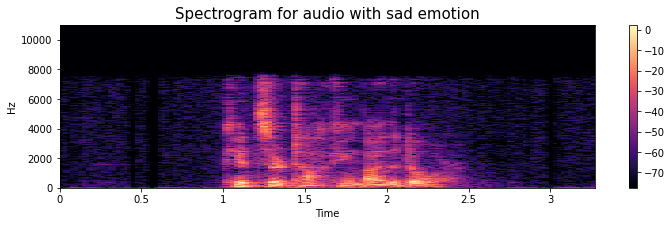

In [102]:
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)


In [11]:
Audio(path)

In [12]:
emotion='happy'
path = np.array(Ravdess_df.Path[Ravdess_df.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)


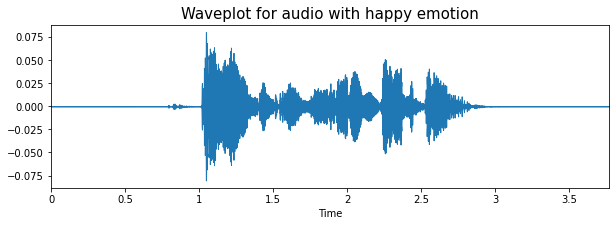

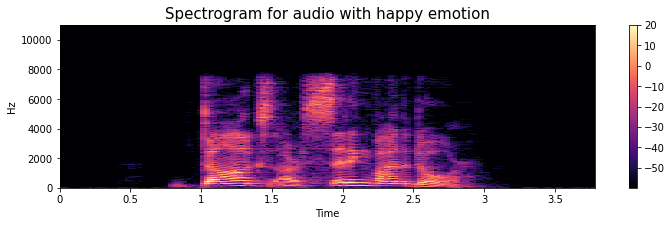

In [105]:
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)


In [13]:
Audio(path)

In [14]:
#DataFlair - Extract features (mfcc, chroma, mel) from a sound file
def extract_feature(file_name, mfcc, chroma, mel):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate=sound_file.samplerate
        if chroma:
            stft=np.abs(librosa.stft(X))
        result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result=np.hstack((result, mfccs))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result=np.hstack((result, chroma))
    if mel:
            mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
            result=np.hstack((result, mel))
    return result

In [15]:
#DataFlair - Emotions in the RAVDESS dataset
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}

#DataFlair - Emotions to observe
observed_emotions=['calm', 'happy', 'fearful', 'disgust']

In [16]:
#DataFlair - Load the data and extract features for each sound file
def load_data(test_size=0.2):
    x,y=[],[]
    for file in glob.glob("D:\\project\\Data\\Actor_*\\*.wav"):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]]
        if emotion not in observed_emotions:
            continue
        feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
        x.append(feature)
        y.append(emotion)
    return train_test_split(np.array(x), y, test_size=test_size, random_state=9)

In [17]:
#DataFlair - Split the dataset
x_train,x_test,y_train,y_test=load_data(test_size=0.20)

In [18]:
#DataFlair - Get the shape of the training and testing datasets
print((x_train.shape[0], x_test.shape[0]))

(614, 154)


In [19]:
#DataFlair - Get the number of features extracted
print(f'Features extracted: {x_train.shape[1]}')

Features extracted: 180


In [20]:
#DataFlair - Initialize the Multi Layer Perceptron Classifier
model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)

In [21]:
#DataFlair - Train the model
model.fit(x_train,y_train)

MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=(300,),
              learning_rate='adaptive', max_iter=500)

In [22]:
#DataFlair - Predict for the test set
y_pred=model.predict(x_test)

In [23]:
#DataFlair - Calculate the accuracy of our model
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)

#DataFlair - Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 78.57%


In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        calm       0.89      0.91      0.90        44
     disgust       0.72      0.71      0.72        41
     fearful       0.81      0.76      0.78        33
       happy       0.71      0.75      0.73        36

    accuracy                           0.79       154
   macro avg       0.78      0.78      0.78       154
weighted avg       0.79      0.79      0.79       154



In [25]:
from sklearn.metrics import confusion_matrix
matrix=confusion_matrix(y_test,y_pred)
print(matrix)

[[40  2  1  1]
 [ 4 29  2  6]
 [ 0  4 25  4]
 [ 1  5  3 27]]


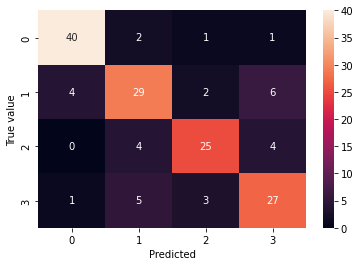

In [26]:
sns.heatmap(matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True value')
plt.show()

In [27]:
filex="D:\\project\\Data/Actor_07/03-01-01-01-02-01-07.wav"
Audio(filex)

In [28]:
featurex=extract_feature(filex,mfcc=True,chroma=True,mel=True)

In [29]:
model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_predx=model.predict([featurex])
accuracyx=accuracy_score(y_true=y_test, y_pred=y_pred)
#DataFlair - Print the accuracy
print("Accuracy: {:.2f}%".format(accuracyx*100))
y_predx

Accuracy: 72.73%


array(['calm'], dtype='<U7')

In [30]:
speakerx = pyttsx3.init()

In [31]:
def talk(text):
    speakerx.say(text)
    speakerx.runAndWait()

In [32]:
#print(y_pred)
talk(' the obeserved emotion from the given audio file is ')
talk(y_predx)
talk(' and the accuracy of detection of emotion is  ')
accu=int(accuracyx*100)
talk(accu)
talk('%')

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        calm       0.74      0.91      0.82        44
     disgust       0.78      0.68      0.73        41
     fearful       0.65      0.79      0.71        33
       happy       0.75      0.50      0.60        36

    accuracy                           0.73       154
   macro avg       0.73      0.72      0.71       154
weighted avg       0.73      0.73      0.72       154



In [34]:
from sklearn.metrics import confusion_matrix
matrix=confusion_matrix(y_test,y_pred)
print(matrix)

[[40  2  2  0]
 [ 5 28  6  2]
 [ 2  1 26  4]
 [ 7  5  6 18]]


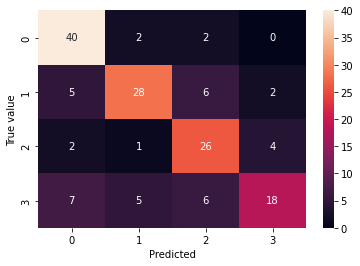

In [37]:
sns.heatmap(matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True value')
plt.show()

In [40]:
import pyaudio
import numpy

RATE=16000
RECORD_SECONDS = 5
CHUNKSIZE = 1024

# initialize portaudio
p = pyaudio.PyAudio()
stream = p.open(format=pyaudio.paInt16, channels=1, rate=RATE, input=True, frames_per_buffer=CHUNKSIZE)

frames = [] # A python-list of chunks(numpy.ndarray)
for _ in range(0, int(RATE / CHUNKSIZE * RECORD_SECONDS)):
    data = stream.read(CHUNKSIZE)
    frames.append(numpy.fromstring(data, dtype=numpy.int16))

#Convert the list of numpy-arrays into a 1D array (column-wise)
numpydata = numpy.hstack(frames)

# close stream
stream.stop_stream()
stream.close()
p.terminate()
import scipy.io.wavfile as wav
wav.write('out.wav',RATE,numpydata)
 

In [41]:
filex="out.wav"
Audio(filex)

In [42]:
featurex=extract_feature(filex,mfcc=True,chroma=True,mel=True)

In [43]:
model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_predx=model.predict([featurex])
accuracyx=accuracy_score(y_true=y_test, y_pred=y_pred)
#DataFlair - Print the accuracy
print("Accuracy: {:.2f}%".format(accuracyx*100))
y_predx

Accuracy: 75.97%


array(['calm'], dtype='<U7')

In [44]:
#print(y_pred)
talk(' the obeserved emotion from the given audio file is ')
talk(y_predx)
talk(' and the accuracy of detection of emotion is  ')
accu=int(accuracyx*100)
talk(accu)
talk('%')

In [45]:
from sklearn.metrics import confusion_matrix
matrix=confusion_matrix(y_test,y_pred)
print(matrix)

[[39  4  1  0]
 [ 3 30  1  7]
 [ 2  2 20  9]
 [ 3  3  2 28]]


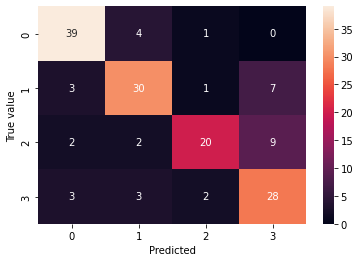

In [46]:
sns.heatmap(matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True value')
plt.show()